In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# HBIPS-2_Measure_Description: Hours of physical-restraint use
# HBIPS-3_Measure_Description: Hours of seclusion
# HBIPS-5_Measure_Description: Patients discharged on multiple antipsychotic medications with appropriate justification
# HBIPS-6_Measure_Description: Post-discharge continuing care plan created
# HBIPS-7_Measure_Description: Post-discharge continuing care plan transmitted to the next level of care provider upon discharge
# SUB-1_Measure_Description: Alcohol Use Screening
# TOB-1_Measure_Description: Tobacco Use Screening
# TOB-2/-2a_Measure_Desc: Tobacco Use Treatment (during the hospital stay)
# PEoC_Measure_Description: Assessment of Patient Experience of Care
# EHR_Use_Measure_Description: Use of an Electronic Health Record
# HIE_Measure_Description: Interoperable health information exchanged with HISP
# FUH_Measure_Description: Percent of patients receiving follow-up care within 30 days (FUH-30) or within 7 days (FUH-7) after hospitalization for mental illness
# IMM-2_Measure_Description: Influenza Immunization
# HCP_Measure_Description: Healthcare Personnel Influenza Vaccination

In [30]:
df=pd.read_csv('Inpatient_Psychiatric_Facility_Quality_Measure_Data___by_Facility.csv')
# display(df.columns)
drop_cols=['HBIPS-2_Measure_Description', 
           'HBIPS-2_Overall_Footnote', 
           'HBIPS-3_Measure_Description', 
           'HBIPS-3_Overall_Footnote', 
           'HBIPS-5_Measure_Description', 
           'HBIPS-5_Overall_Footnote', 
           'HBIPS-6_Measure_Description', 
           'HBIPS-6_Overall_Footnote', 
           'HBIPS-7_Measure_Description', 
           'HBIPS-7_Overall_Footnote', 
           'SUB-1_Measure_Description', 
           'SUB-1_Footnote', 
           'TOB-1_Measure_Description', 
           'TOB-1_Footnote', 
           'TOB-2/-2a_Measure_Desc', 
           'TOB-2_Footnote', 
           'TOB-2a_Footnote', 
           'PEoC_Measure_Description', 
           'PEoC_Assessed_Footnote', 
           'EHR_Use_Measure_Description', 
           'EHR_Use_Footnote', 
           'HIE_Measure_Description', 
           'HIE_Footnote', 
           'Start_Date', 
           'End_Date', 
           'FUH_Measure_Description', 
           'FUH-30_Footnote', 
           'FUH-7_Footnote', 
           'FUH_Measure_Start_Date', 
           'FUH_Measure_End_Date', 
           'IMM-2_Measure_Description', 
           'IMM-2_Footnote', 
           'HCP_Measure_Description', 
           'HCP_Footnote', 
           'Flu_Season_Start_Date', 
           'Flu_Season_End_Date']
df=df.drop(columns=drop_cols)

In [31]:
df.isna().sum()

Provider_Number                    0
Hospital_Name                      0
Address                            0
City                               0
State                              0
ZIP_Code                           0
County_Name                        0
HBIPS-2_Overall_Rate_Per_1000     31
HBIPS-2_Overall_Num               15
HBIPS-2_Overall_Den               15
HBIPS-3_Overall_Rate_Per_1000     35
HBIPS-3_Overall_Num                0
HBIPS-3_Overall_Den                0
HBIPS-5_Overall_%_of_Total       939
HBIPS-5_Overall_Num                0
HBIPS-5_Overall_Den                0
HBIPS-6_Overall_%_of_Total         0
HBIPS-6_Overall_Num                0
HBIPS-6_Overall_Den                0
HBIPS-7_Overall_%_of_Total         0
HBIPS-7_Overall_Num                0
HBIPS-7_Overall_Den                0
SUB-1_%                            0
SUB-1_Numerator                    0
SUB-1_Denominator                  0
TOB-1_%                            0
TOB-1_Numerator                    0
T

In [32]:
df.head()

,Provider_Number,Hospital_Name,Address,City,State,ZIP_Code,County_Name,HBIPS-2_Overall_Rate_Per_1000,HBIPS-2_Overall_Num,HBIPS-2_Overall_Den,...,FUH-30_Denominator,FUH-7_%,FUH-7_Numerator,FUH-7_Denominator,IMM-2_%,IMM-2_Numerator,IMM-2_Denominator,HCP_%,HCP_Numerator,HCP_Denominator
0,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN STREET PO BOX 1010,OPP,AL,36467,Covington,0.00,0.00,3513.0,...,Not Available,Not Available,Not Available,Not Available,39.06%,50,128,54,15,28
1,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,Crenshaw,0.44,59.63,5611.0,...,39,Not Available,Not Available,Not Available,100.00%,88,88,34,15,44
2,10011,ST. VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,0.00,0.00,24771.0,...,36,Not Available,Not Available,Not Available,67.50%,54,80,42,14,33
3,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DeKalb,0.00,0.00,5832.0,...,Not Available,Not Available,Not Available,Not Available,99.06%,105,106,100,54,54
4,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,Shelby,0.11,41.02,15507.0,...,85,21.18%,18,85,100.00%,171,171,71,65,92


In [33]:
metric_cols=[
#     'HBIPS-2_Overall_Rate_Per_1000', 
#     'HBIPS-3_Overall_Rate_Per_1000', 
    'HBIPS-5_Overall_%_of_Total', 
    'HBIPS-6_Overall_%_of_Total', 
    'HBIPS-7_Overall_%_of_Total', 
    'SUB-1_%', 
    'TOB-1_%', 
    'TOB-2_%', 
    'TOB-2a_%', 
    'FUH-30_%', 
    'FUH-7_%', 
    'IMM-2_%', 
    'HCP_%'
    ]
for each_col in metric_cols: 
    if df[each_col].dtype=='O': 
        df[each_col]=pd.to_numeric(df[each_col].str.replace('%', ''), errors='coerce')

In [34]:
calc_cols=['HBIPS-2_Overall_Num', 
           'HBIPS-3_Overall_Num', 
           'HBIPS-3_Overall_Den', 
           'HBIPS-2_Overall_Den', 
           'HBIPS-5_Overall_Den', 
           'HBIPS-6_Overall_Den', 
           'HBIPS-7_Overall_Den', 
           'HBIPS-2_Overall_Den', 
           'TOB-1_Denominator', 
           'SUB-1_Denominator', 
           'TOB-2/-2a_Denominator', 
           'HCP_Denominator', 
           'FUH-7_Denominator', 
           'FUH-30_Denominator', 
           'IMM-2_Denominator'
          ]
# df[calc_cols]=df[calc_cols].replace({'Not Available': np.nan})
df=df.replace({'Not Available': np.nan})
df[calc_cols]=df[calc_cols].astype('float')
print(f"5: {(df['HBIPS-2_Overall_Num']/df['HBIPS-2_Overall_Den']>=1).sum()}")
print(f"6: {(df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den']>=1).sum()}")
print(f"7: {(df['HBIPS-5_Overall_%_of_Total']>100).sum()}") # 5 in uniques of 1%
print(f"8: {(df['HBIPS-6_Overall_%_of_Total']>100).sum()}")
print(f"9: {(df['HBIPS-7_Overall_%_of_Total']>100).sum()}")
print(f"SUB-1: {(df['SUB-1_%']>100).sum()}")
print(f"TOB: {(df['TOB-1_%']>100).sum()}")
print(f"TOB-2: {(df['TOB-2_%']>100).sum()}")
print(f"TOB-2a: {(df['TOB-2a_%']>100).sum()}")
print(f"FUH-7_%: {(df['FUH-7_%']>100).sum()}")
print(f"FUH-30_%: {(df['FUH-30_%']>100).sum()}")
print(f"IMM_%: {(df['IMM-2_%']>100).sum()}")
print(f"HCP_%: {(df['HCP_%']>100).sum()}")

5: 10
6: 4
7: 0
8: 0
9: 0
SUB-1: 0
TOB: 0
TOB-2: 0
TOB-2a: 0
FUH-7_%: 0
FUH-30_%: 0
IMM_%: 0
HCP_%: 0


In [35]:
# HBIPS-2_Overall_Den = Hours
# HBIPS-3_Overall_Den = Hours
# HBIPS-5_Overall_Den = Number of Discharged
# HBIPS-6_Overall_Den = Number of Patients
# HBIPS-7_Overall_Den = Number of Patients
# SUB-1_Den = Number of Patients
# TOB-1_Den = Number of Patients
# TOB-2/-2a_Den = Number of Treatment? Some Show Patients
# FUH-7_Den = Number of Patients Hospitalized? 
# FUH-7_Den = Number of Patients Hospitalized? 
# IMM-2_Den = Number of Patients? But Diff from Above
# HCP_Den = Number of HCP? 

In [36]:
df=df[~(df['HBIPS-2_Overall_Num']/df['HBIPS-2_Overall_Den']>1)]
df=df[~(df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den']>1)]
df=df[~(df['HBIPS-5_Overall_%_of_Total']>100)] # 5 in uniques of 1%
df=df[~(df['HBIPS-6_Overall_%_of_Total']>100)]
df=df[~(df['HBIPS-7_Overall_%_of_Total']>100)]
df=df[~(df['SUB-1_%']>100)]
df=df[~(df['TOB-1_%']>100)]
df=df[~(df['TOB-2_%']>100)]
df=df[~(df['TOB-2a_%']>100)]
df=df[~(df['FUH-7_%']>100)]
df=df[~(df['FUH-30_%']>100)]
df=df[~(df['IMM-2_%']>100)]
df=df[~(df['HCP_%']>100)]

df['HBIPS-2_Overall_Rate']=df['HBIPS-2_Overall_Num']/df['HBIPS-2_Overall_Den']*100
df['HBIPS-3_Overall_Rate']=df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den']*100
df['Number_Of_Patients']=df[['HBIPS-6_Overall_Den', 
                             'HBIPS-7_Overall_Den', 
                             'SUB-1_Denominator', 
                             'TOB-1_Denominator', 
                             'TOB-2/-2a_Denominator', 
                             'FUH-7_Denominator', 
                             'FUH-30_Denominator', 
                             'IMM-2_Denominator']].max(axis=1)
# df['HCP_Coverage']=(df['HBIPS-6_Overall_Den']+df['HBIPS-7_Overall_Den'])/df['HCP_Denominator']
df['HCP_Coverage']=df['Number_Of_Patients']/df['HCP_Denominator']



metric_cols=metric_cols+['HBIPS-2_Overall_Rate', 'HBIPS-3_Overall_Rate', 'HCP_Coverage']

In [37]:
rename_cols={
    'HBIPS-5_Overall_%_of_Total': 'Multiple Antipsychotic Treatments', 
    'HBIPS-6_Overall_%_of_Total': 'Post-Dicharge Plan Created', 
    'HBIPS-7_Overall_%_of_Total': 'Post-Discharge Plan Transferred', 
    'SUB-1_%': 'Alcohol Screen', 
    'TOB-1_%': 'Tabacco Screen', 
    'TOB-2_%': 'Tabacco Use Treatment', 
    'TOB-2a_%': 'Tabacco Use Treatment Stay', 
    'FUH-30_%': 'FUH-30', 
    'FUH-7_%': 'FUH-7', 
    'IMM-2_%': 'Immunization', 
    'HCP_%' : 'HCP Vaccine', 
    'HBIPS-2_Overall_Rate': 'Seclusion', 
    'HBIPS-3_Overall_Rate': 'Physical-Restraint', 
    'HCP_Coverage': 'HCP_Coverage'
    }
df.rename(columns=rename_cols, inplace=True)

In [38]:
df.columns

Index(['Provider_Number', 'Hospital_Name', 'Address', 'City', 'State',
       'ZIP_Code', 'County_Name', 'HBIPS-2_Overall_Rate_Per_1000',
       'HBIPS-2_Overall_Num', 'HBIPS-2_Overall_Den',
       'HBIPS-3_Overall_Rate_Per_1000', 'HBIPS-3_Overall_Num',
       'HBIPS-3_Overall_Den', 'Multiple Antipsychotic Treatments',
       'HBIPS-5_Overall_Num', 'HBIPS-5_Overall_Den',
       'Post-Dicharge Plan Created', 'HBIPS-6_Overall_Num',
       'HBIPS-6_Overall_Den', 'Post-Discharge Plan Transferred',
       'HBIPS-7_Overall_Num', 'HBIPS-7_Overall_Den', 'Alcohol Screen',
       'SUB-1_Numerator', 'SUB-1_Denominator', 'Tabacco Screen',
       'TOB-1_Numerator', 'TOB-1_Denominator', 'Tabacco Use Treatment',
       'TOB-2_Numerator', 'TOB-2/-2a_Denominator',
       'Tabacco Use Treatment Stay', 'TOB-2a_Numerator',
       'TOB-2/-2a__Denominator', 'PEoC_Assessed_Response', 'EHR_Use_Response',
       'HIE_Response', 'FUH-30', 'FUH-30_Numerator', 'FUH-30_Denominator',
       'FUH-7', 'FUH-7_Numerato

In [39]:
updated_metric_cols=list(rename_cols.values())

In [40]:
updated_metric_cols

['Multiple Antipsychotic Treatments',
 'Post-Dicharge Plan Created',
 'Post-Discharge Plan Transferred',
 'Alcohol Screen',
 'Tabacco Screen',
 'Tabacco Use Treatment',
 'Tabacco Use Treatment Stay',
 'FUH-30',
 'FUH-7',
 'Immunization',
 'HCP Vaccine',
 'Seclusion',
 'Physical-Restraint',
 'HCP_Coverage']

In [41]:
len(df)

1632

1632

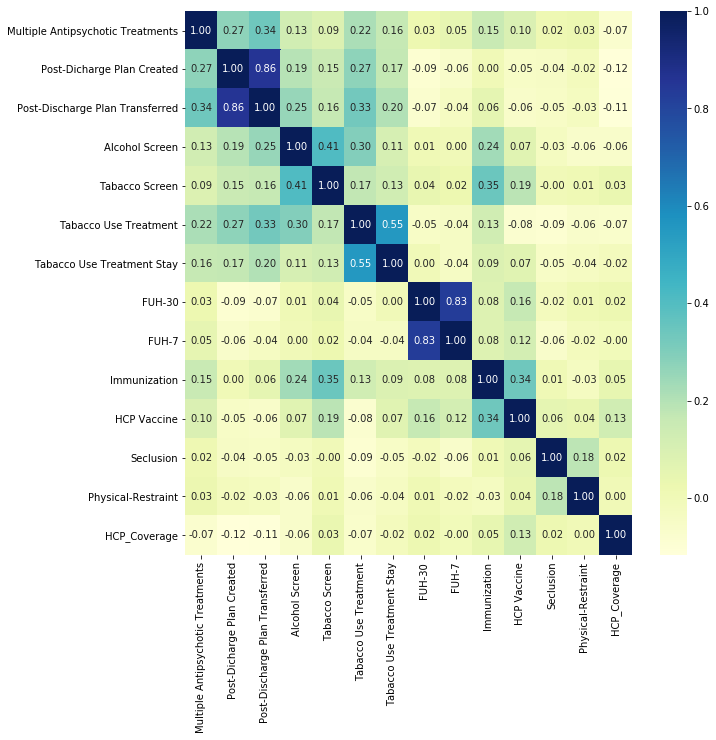

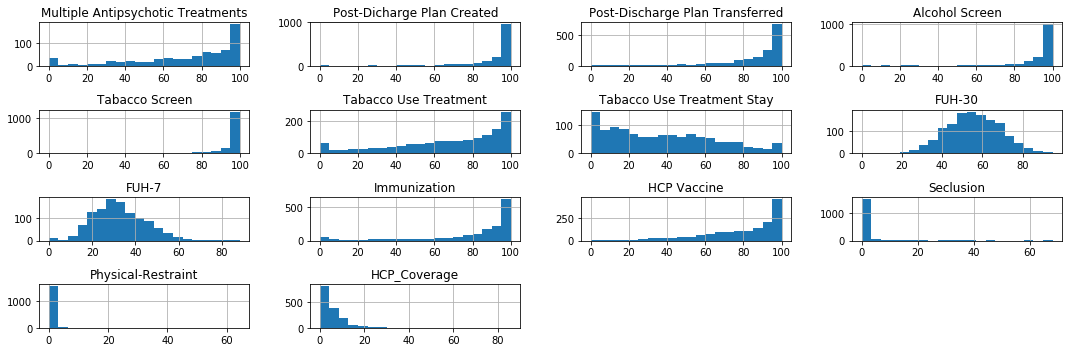

In [74]:
import seaborn as sn
display(len(df))
fig=plt.figure(figsize=(10, 10))
sn.heatmap(df[updated_metric_cols].corr(), cmap="YlGnBu", annot=True, fmt=".2f")
# plt.xticks(rotation=30) 
df[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.tight_layout()
plt.show()

1632

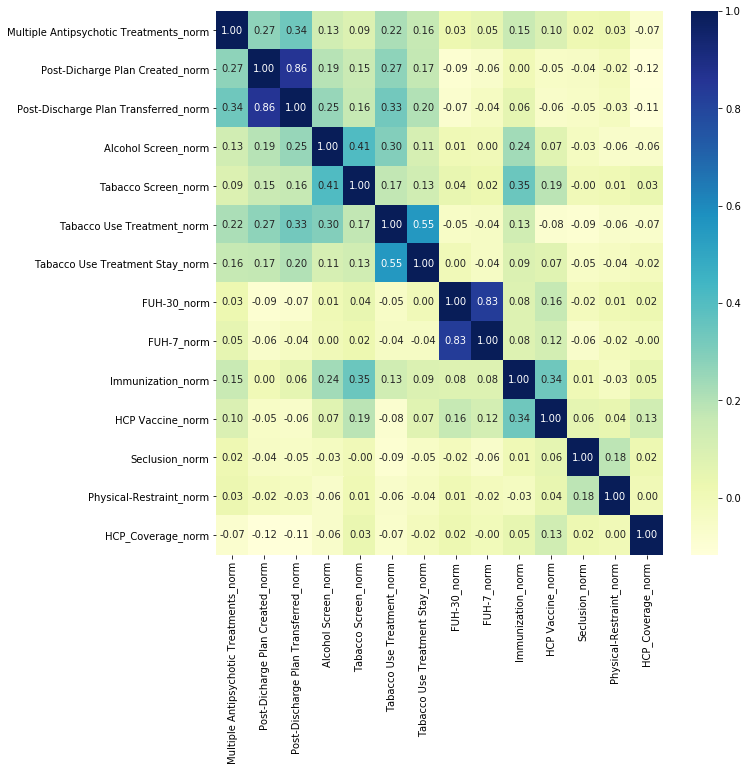

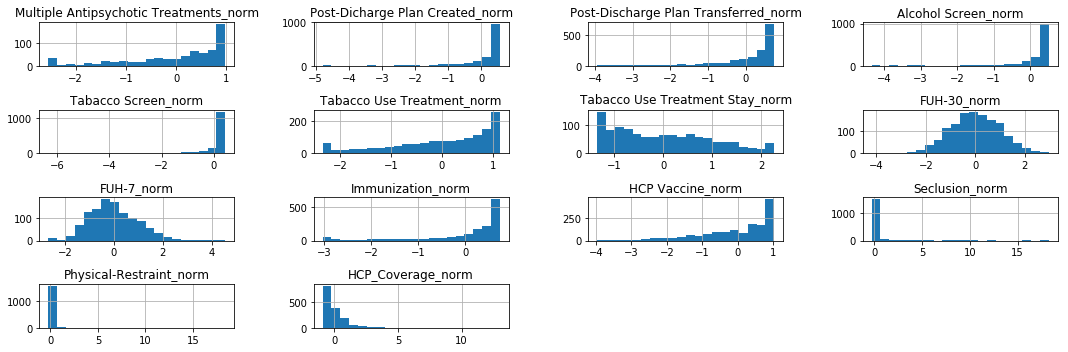

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
norm_metrics=[]

for each_metric in updated_metric_cols: 
    norm_metrics.append(each_metric+'_norm')
    
df=df.reset_index(drop=True)
df[norm_metrics]=pd.DataFrame(scaler.fit_transform(df[updated_metric_cols]))

display(len(df))
fig=plt.figure(figsize=(10, 10))
sn.heatmap(df[norm_metrics].corr(), cmap="YlGnBu", annot=True, fmt=".2f")
# plt.xticks(rotation=30) 
df[norm_metrics].hist(bins=20, figsize=(15, 5))
plt.tight_layout()
plt.show()

52

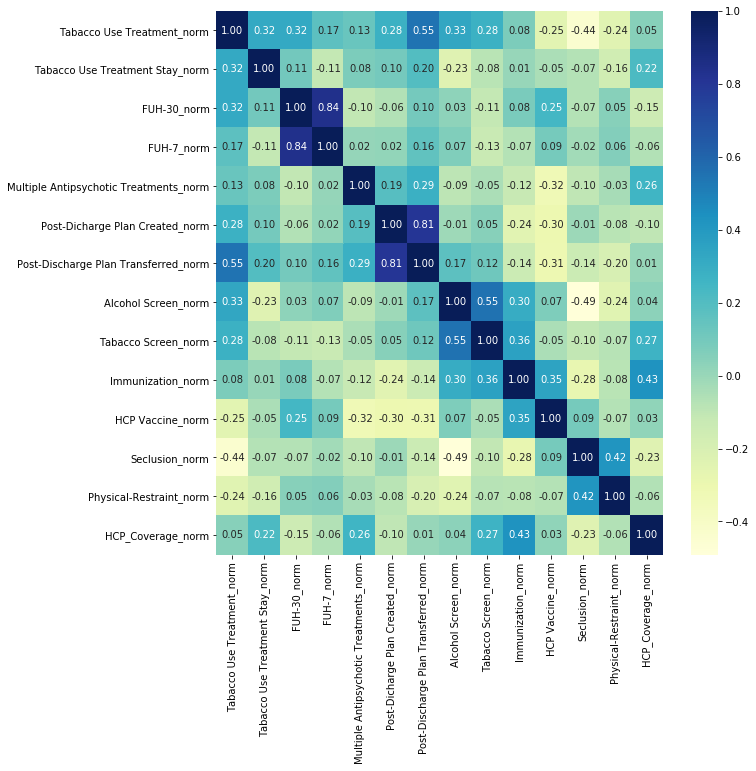

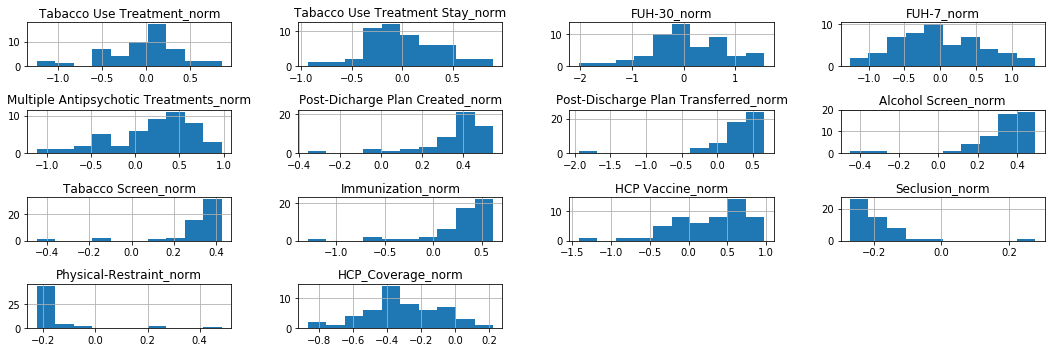

52

In [110]:
mean_list=['Tabacco Use Treatment_norm', 
           'Tabacco Use Treatment Stay_norm', 
           'FUH-30_norm', 
           'FUH-7_norm']
median_list=[each_metric for each_metric in norm_metrics if not each_metric in mean_list]
state_df=state_df.loc[state_df['State']]
state_df=df.groupby('State').mean()[mean_list]
state_df[median_list]=df.groupby('State').median()[median_list]
display(len(state_df))
# filter_df = state_df.index.isin(['AK', 'MT', 'VT', 'SD'])
# state_df=state_df.loc[~filter_df]
fig=plt.figure(figsize=(10, 10))
sn.heatmap(state_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
state_df.hist(figsize=(15, 5))
plt.tight_layout()
plt.show()
display(len(state_df))

In [73]:
corr_df=df.groupby('State').median()[['Alcohol Screen_norm', 'Seclusion_norm']]#.plot(kind='scatter', y='Alcohol Screen_norm', x='Seclusion_norm')
import scipy.stats as sts
sts.linregress(corr_df['Alcohol Screen_norm'], corr_df['Seclusion_norm'])
#.corr()

LinregressResult(slope=-0.24782186905430306, intercept=-0.11870022270386674, rvalue=-0.4908541223448913, pvalue=0.0002202883827012863, stderr=0.06220723159449534)

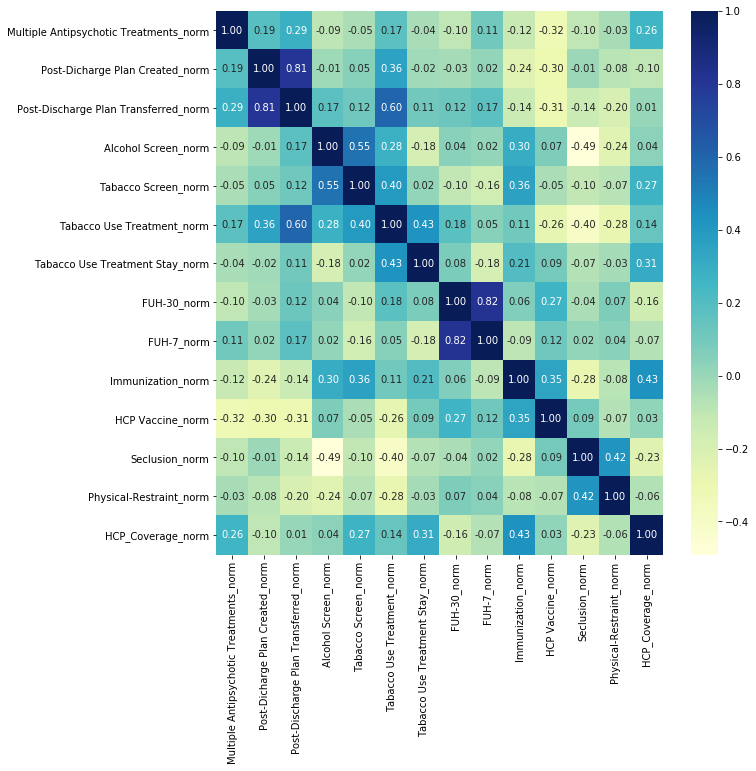

In [63]:
fig=plt.figure(figsize=(10, 10))
sn.heatmap(df.groupby('State').median()[norm_metrics].corr(), cmap="YlGnBu", annot=True, fmt=".2f")

1632

389

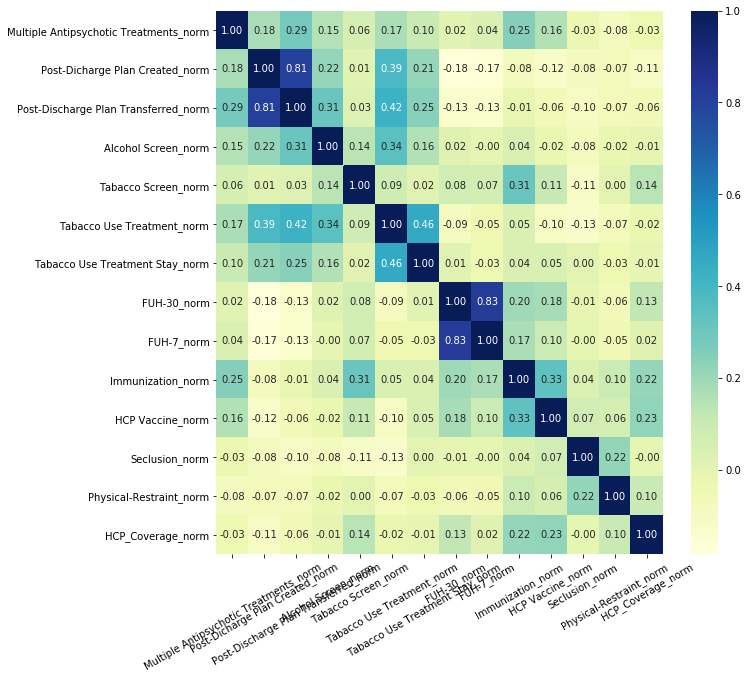

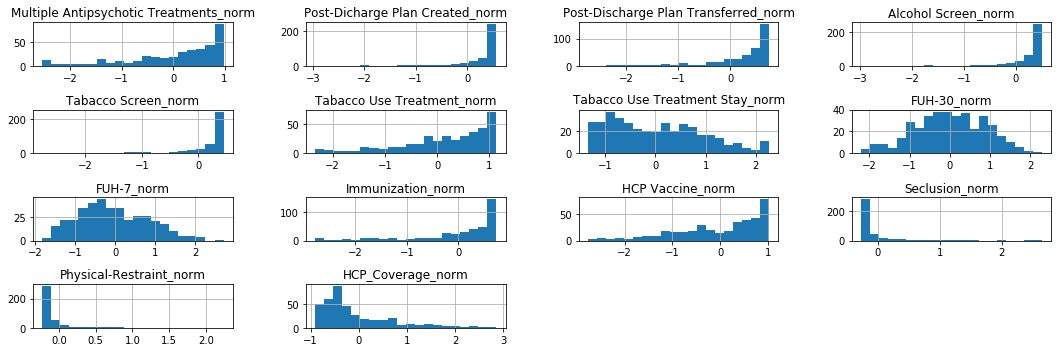

In [44]:
display(len(df))
norm_df=df[((df[norm_metrics]>-3)&(df[norm_metrics]<3)).all(axis=1)]
display(len(norm_df))
fig=plt.figure(figsize=(10, 10))
sn.heatmap(norm_df[norm_metrics].corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.xticks(rotation=30) 
norm_df[norm_metrics].hist(bins=20, figsize=(15, 5))
plt.tight_layout()
plt.show()

In [45]:
len(df.columns)

67

In [46]:
df.columns

Index(['Provider_Number', 'Hospital_Name', 'Address', 'City', 'State',
       'ZIP_Code', 'County_Name', 'HBIPS-2_Overall_Rate_Per_1000',
       'HBIPS-2_Overall_Num', 'HBIPS-2_Overall_Den',
       'HBIPS-3_Overall_Rate_Per_1000', 'HBIPS-3_Overall_Num',
       'HBIPS-3_Overall_Den', 'Multiple Antipsychotic Treatments',
       'HBIPS-5_Overall_Num', 'HBIPS-5_Overall_Den',
       'Post-Dicharge Plan Created', 'HBIPS-6_Overall_Num',
       'HBIPS-6_Overall_Den', 'Post-Discharge Plan Transferred',
       'HBIPS-7_Overall_Num', 'HBIPS-7_Overall_Den', 'Alcohol Screen',
       'SUB-1_Numerator', 'SUB-1_Denominator', 'Tabacco Screen',
       'TOB-1_Numerator', 'TOB-1_Denominator', 'Tabacco Use Treatment',
       'TOB-2_Numerator', 'TOB-2/-2a_Denominator',
       'Tabacco Use Treatment Stay', 'TOB-2a_Numerator',
       'TOB-2/-2a__Denominator', 'PEoC_Assessed_Response', 'EHR_Use_Response',
       'HIE_Response', 'FUH-30', 'FUH-30_Numerator', 'FUH-30_Denominator',
       'FUH-7', 'FUH-7_Numerato

In [54]:
norm_df.groupby('State').median()[norm_metrics]

,Multiple Antipsychotic Treatments_norm,Post-Dicharge Plan Created_norm,Post-Discharge Plan Transferred_norm,Alcohol Screen_norm,Tabacco Screen_norm,Tabacco Use Treatment_norm,Tabacco Use Treatment Stay_norm,FUH-30_norm,FUH-7_norm,Immunization_norm,HCP Vaccine_norm,Seclusion_norm,Physical-Restraint_norm,HCP_Coverage_norm
State,,,,,,,,,,,,,,
AL,-0.224730,-0.042649,0.131820,0.393210,0.137760,0.405198,1.057406,-1.321998,-1.272554,0.596240,-0.344823,-0.263513,-0.205867,0.717454
AR,0.604992,0.398058,0.543060,0.344215,0.183277,0.747438,0.547484,-0.476683,-0.470609,0.519238,-0.269880,-0.205375,-0.215395,-0.665596
AZ,-0.551612,0.567911,0.717497,0.428138,0.246458,1.100448,0.026342,-0.594686,0.385018,0.378069,-0.669577,-0.233204,-0.207097,-0.580684
CA,0.699495,0.506293,0.393007,0.460155,0.376896,0.197422,-0.135429,-0.368512,0.041620,0.311259,0.429590,-0.213703,-0.187766,-0.384067
CO,-0.270924,0.524510,0.338847,0.158906,-0.058916,0.173100,-0.789751,-0.167301,-0.187449,-0.334948,0.629439,-0.155450,-0.147135,-0.413815
CT,0.477695,0.284466,0.331110,0.433959,0.260725,0.164067,0.100171,0.577787,0.460418,0.440350,0.879249,-0.080377,-0.153320,0.070465
DC,-1.730783,-0.356904,-1.945951,-0.090437,0.365347,-1.632952,-0.937770,-1.902562,-1.519653,-0.283236,-2.568139,-0.233295,-0.170889,-0.442762
DE,0.008706,0.426992,0.435678,0.455304,0.120776,0.973281,-0.676475,-0.190750,-0.310794,0.498478,-0.369805,-0.235150,-0.194709,-0.537665
FL,0.610281,0.528261,0.627465,0.494597,0.410185,0.277336,-0.463676,-0.702100,-0.713200,0.680035,-0.020069,-0.243745,-0.196492,-0.163464


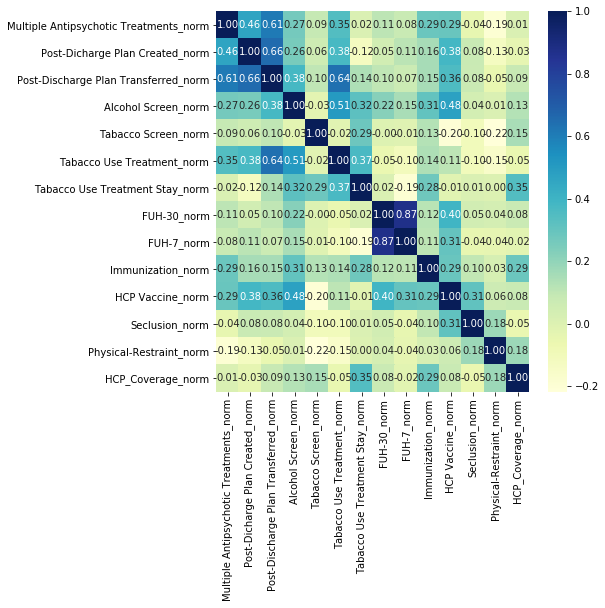

In [53]:
fig=plt.figure(figsize=(7, 7))
sn.heatmap(norm_df.groupby('State').median()[norm_metrics].corr(), cmap="YlGnBu", annot=True, fmt=".2f")





In [678]:
df.to_csv('updated_05052021.csv', index=False)

1417

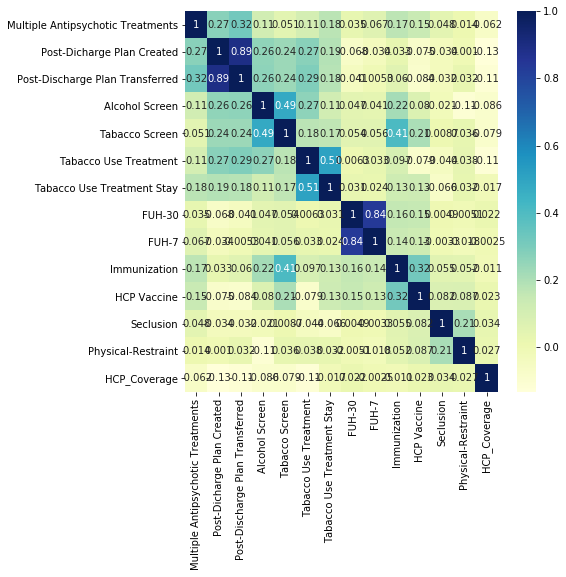

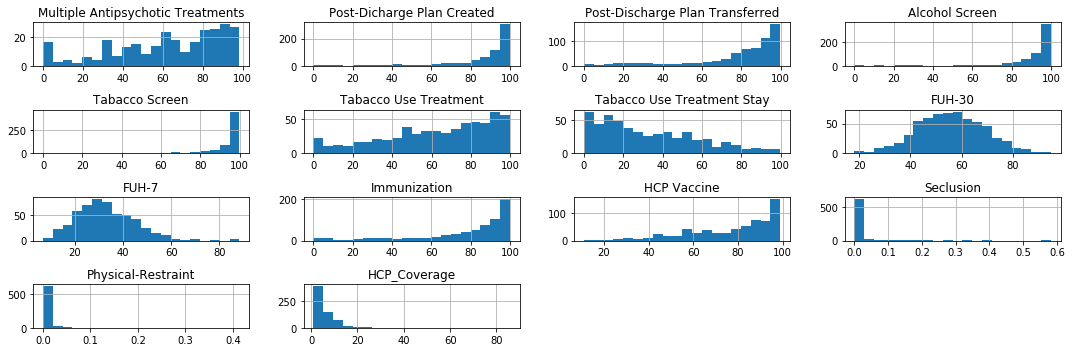

In [529]:
coverage=df[~(df['HCP_Coverage']<1)]
display(len(low_coverage))
fig=plt.figure(figsize=(7, 7))
sn.heatmap(coverage[updated_metric_cols].corr(), cmap="YlGnBu", annot=True)
coverage[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

594

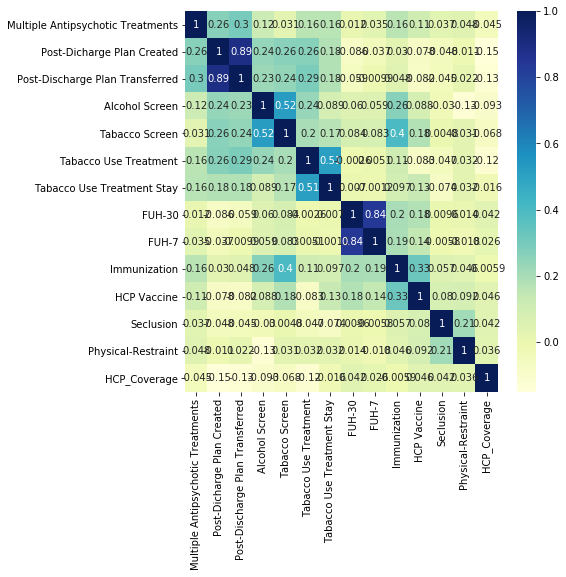

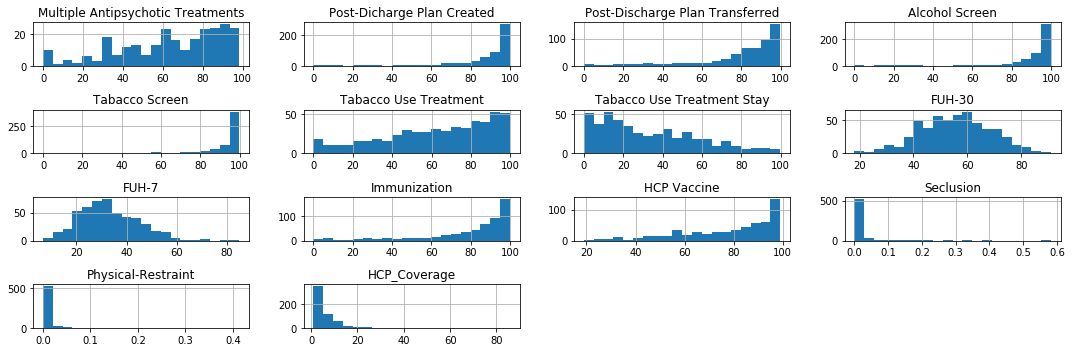

In [530]:
# no_seclusion=df[~(df['Seclusion']>0.0005)]
seclusion=coverage[~(coverage['Seclusion']==0)]
display(len(seclusion))
fig=plt.figure(figsize=(7, 7))
sn.heatmap(seclusion[updated_metric_cols].corr(), cmap="YlGnBu", annot=True)
seclusion[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

107

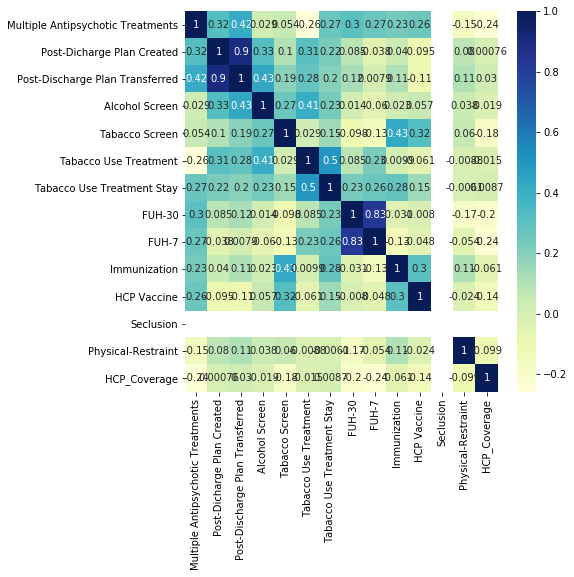

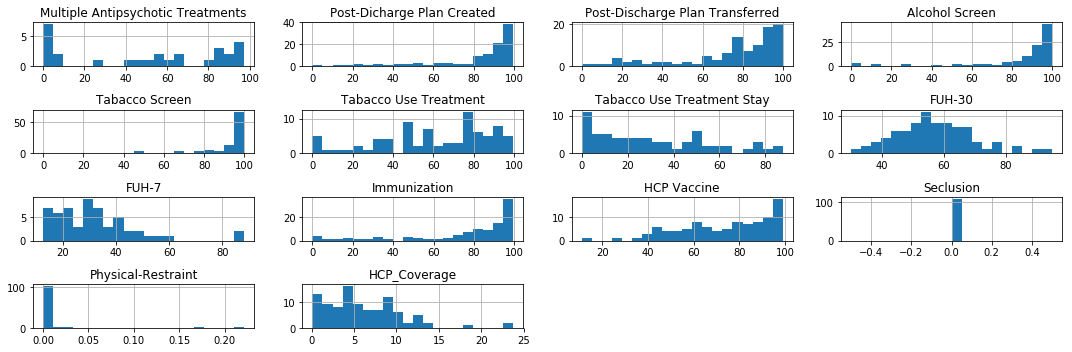

In [531]:
# no_seclusion=df[~(df['Seclusion']>0.0005)]
no_seclusion=df[(df['Seclusion']==0)]
display(len(no_seclusion))
fig=plt.figure(figsize=(7, 7))
sn.heatmap(no_seclusion[updated_metric_cols].corr(), cmap="YlGnBu", annot=True)
no_seclusion[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

236

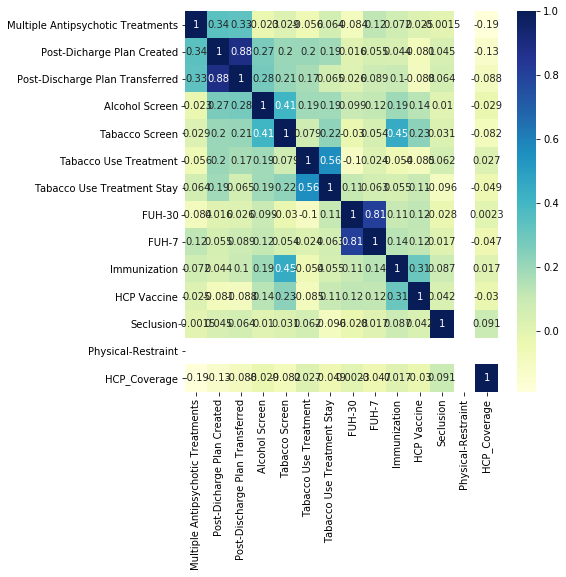

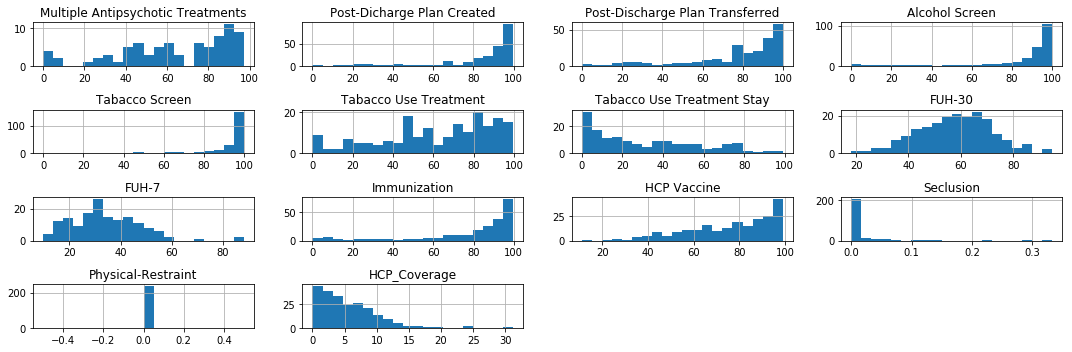

In [532]:
# no_physical_restraint=df[~(df['Physical-Restraint']>0.005)]
no_physical_restraint=df[(df['Physical-Restraint']==0)]
display(len(no_physical_restraint))
fig=plt.figure(figsize=(7, 7))
sn.heatmap(no_physical_restraint[updated_metric_cols].corr(), cmap="YlGnBu", annot=True)
no_physical_restraint[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.tight_layout()
plt.show()

455

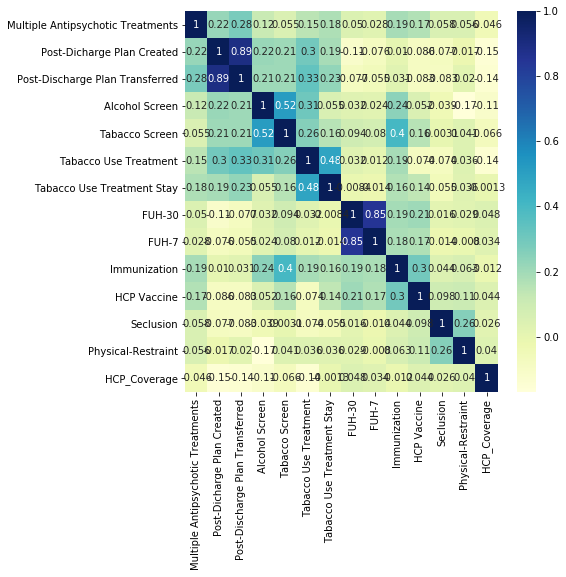

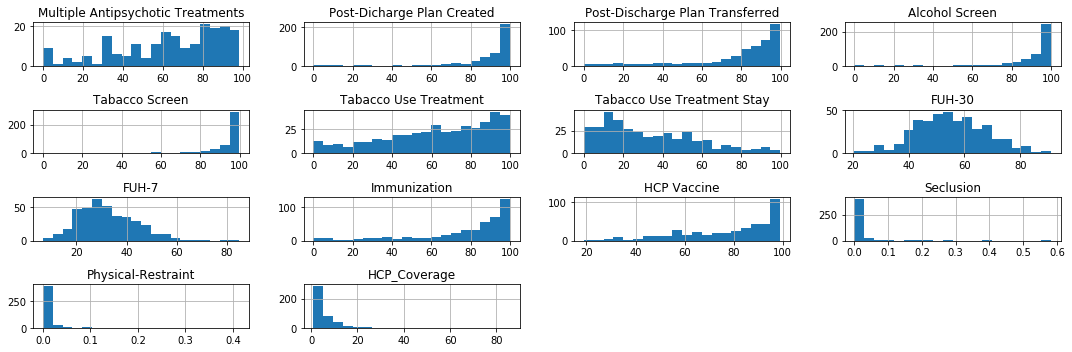

In [533]:
# no_physical_restraint=df[~(df['Physical-Restraint']>0.005)]
physical_restraint=seclusion[~(seclusion['Physical-Restraint']==0)]
display(len(physical_restraint))
fig=plt.figure(figsize=(7, 7))
sn.heatmap(physical_restraint[updated_metric_cols].corr(), cmap="YlGnBu", annot=True)
physical_restraint[updated_metric_cols].hist(bins=20, figsize=(15, 5))
plt.tight_layout()
plt.show()

In [534]:
df_len=len(df)
# display(df['HBIPS-6_Overall_Den'])
# display(df['HBIPS-6_Overall_Den']).astype()
# (df['HBIPS-2_Overall_Den']/df['HBIPS-6_Overall_Den']).round(0).value_counts()

# plt.scatter(df['HBIPS-2_Overall_Den'], df['HBIPS-3_Overall_Den'])
print(f"2==3: {(df['HBIPS-2_Overall_Den']==df['HBIPS-3_Overall_Den']).sum()/df_len}")
print(f"6==7: {(df['HBIPS-6_Overall_Den']==df['HBIPS-7_Overall_Den']).sum()/df_len}")
print(f"6==TOB: {(df['HBIPS-6_Overall_Den']==df['TOB-1_Denominator']).sum()/df_len}")
print(f"6==SUB: {(df['HBIPS-6_Overall_Den']==df['SUB-1_Denominator']).sum()/df_len}")      
print(f"TOB==TOB: {(df['TOB-1_Denominator']==df['TOB-2/-2a_Denominator']).sum()/df_len}")
print(f"SUB==TOB: {(df['SUB-1_Denominator']==df['TOB-1_Denominator']).sum()/df_len}")
# print(f"IMM==TOB: {(df['SUB-1_Denominator']==df['TOB-1_Denominator']).sum()/df_len}")      

2==3: 0.9530456852791879
6==7: 0.949238578680203
6==TOB: 0.021573604060913704
6==SUB: 0.02030456852791878
TOB==TOB: 0.011421319796954314
SUB==TOB: 0.31218274111675126


In [423]:
df[['HBIPS-7_Overall_Den', 'HCP_Denominator']].corr()

,HBIPS-7_Overall_Den,HCP_Denominator
HBIPS-7_Overall_Den,1.000000,0.072313
HCP_Denominator,0.072313,1.000000


In [206]:
df['SUB-1_Denominator']==df['SUB-1_Denominator']

481     8
467     8
572     8
302     7
433     7
       ..
341     1
1332    1
1420    1
724     1
1175    1
Name: SUB-1_Denominator, Length: 696, dtype: int64

In [211]:
df[df['HBIPS-5_Overall_%_of_Total']>1].iloc[2]

Provider_Number                                     10021
Hospital_Name                         DALE MEDICAL CENTER
Address                                 126 HOSPITAL AVE 
City                                                OZARK
State                                                  AL
ZIP_Code                                            36360
County_Name                                          Dale
HBIPS-2_Overall_Rate_Per_1000                         0.0
HBIPS-2_Overall_Num                                   0.0
HBIPS-2_Overall_Den                                3039.0
HBIPS-3_Overall_Rate_Per_1000                         0.0
HBIPS-3_Overall_Num                                   0.0
HBIPS-3_Overall_Den                                3039.0
HBIPS-5_Overall_%_of_Total                          83.33
HBIPS-5_Overall_Num                                    30
HBIPS-5_Overall_Den                                    36
HBIPS-6_Overall_%_of_Total                          96.65
HBIPS-6_Overal

In [186]:
display((df['HBIPS-2_Overall_Num']/df['HBIPS-2_Overall_Den']>1).sum())
display((df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den']>1).sum())

10

4

In [188]:
((df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den'])>1).sum()

4

In [163]:
df['HBIPS-3_Overall_Num'].value_counts()

0                632
Not Available     15
1                 10
1.75               8
.5                 7
                ... 
60.95              1
13.92              1
24.83              1
8.72               1
4.87               1
Name: HBIPS-3_Overall_Num, Length: 874, dtype: int64

In [162]:
display((df['HBIPS-2_Overall_Num']/df['HBIPS-2_Overall_Den']>1).sum())
display((df['HBIPS-3_Overall_Num']/df['HBIPS-3_Overall_Den']>1).sum())

10

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [165]:
df['HBIPS-3_Overall_Num'].value_counts()

0                632
Not Available     15
1                 10
1.75               8
.5                 7
                ... 
60.95              1
13.92              1
24.83              1
8.72               1
4.87               1
Name: HBIPS-3_Overall_Num, Length: 874, dtype: int64

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[metric_cols]=pd.DataFrame(scaler.fit_transform(df[metric_cols]))

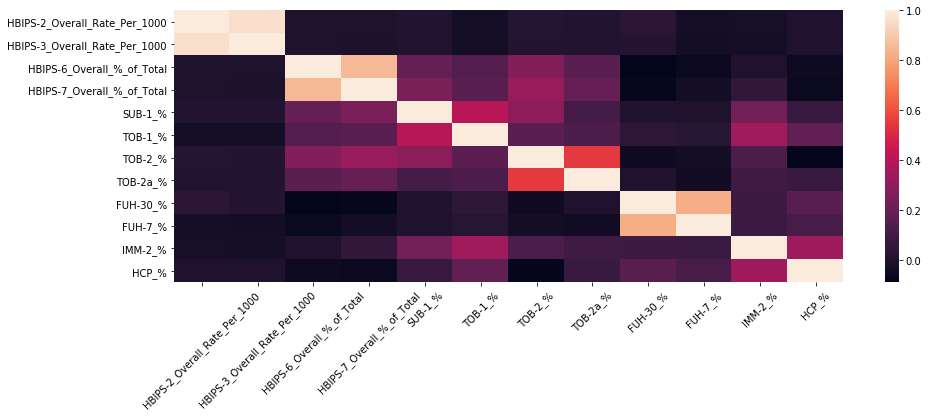

In [128]:
import seaborn as sn
fig=plt.figure(figsize=(15, 5))
sn.heatmap(df[metric_cols].corr())#, rotation=45)
plt.xticks(rotation=45) 
plt.show()

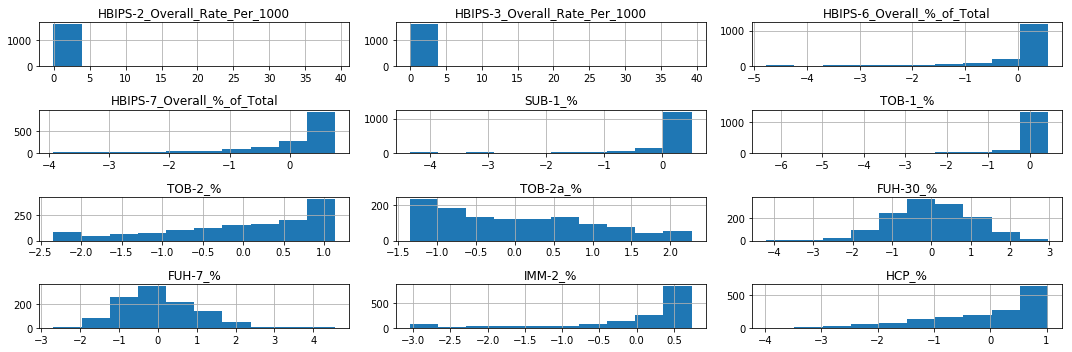

In [115]:
df[metric_cols].hist(figsize=(15, 5))
plt.tight_layout()
plt.show()

In [116]:
df.iloc[0]

Provider_Number                                                     10007
Hospital_Name                                    MIZELL MEMORIAL HOSPITAL
Address                                     702 N MAIN STREET PO BOX 1010
City                                                                  OPP
State                                                                  AL
ZIP_Code                                                            36467
County_Name                                                     Covington
HBIPS-2_Overall_Rate_Per_1000                                   -0.055607
HBIPS-2_Overall_Num                                                   0.0
HBIPS-2_Overall_Den                                                3513.0
HBIPS-3_Overall_Rate_Per_1000                                   -0.044273
HBIPS-3_Overall_Num                                                     0
HBIPS-3_Overall_Den                                                  3513
HBIPS-5_Overall_%_of_Total            

In [122]:
df.to_csv('updated.csv', index=False)

In [118]:
df[(df[metric_cols]>-4)&(df[metric_cols]<4)]

,Provider_Number,Hospital_Name,Address,City,State,ZIP_Code,County_Name,HBIPS-2_Overall_Rate_Per_1000,HBIPS-2_Overall_Num,HBIPS-2_Overall_Den,...,FUH-30_Denominator,FUH-7_%,FUH-7_Numerator,FUH-7_Denominator,IMM-2_%,IMM-2_Numerator,IMM-2_Denominator,HCP_%,HCP_Numerator,HCP_Denominator
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055607,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.568118,NaN,NaN,-1.275036,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038346,NaN,NaN,...,NaN,NaN,NaN,NaN,0.738295,NaN,NaN,-2.275394,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055607,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.491741,NaN,NaN,-1.875251,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055607,NaN,NaN,...,NaN,NaN,NaN,NaN,0.702718,NaN,NaN,1.025787,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051292,NaN,NaN,...,NaN,-0.942808,NaN,NaN,0.738295,NaN,NaN,-0.424732,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054038,NaN,NaN,...,NaN,-1.128327,NaN,NaN,0.700826,NaN,NaN,0.575626,NaN,NaN
1641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.054430,NaN,NaN,...,NaN,-0.865645,NaN,NaN,0.125926,NaN,NaN,-1.024947,NaN,NaN
1642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055214,NaN,NaN,...,NaN,0.621791,NaN,NaN,-3.046432,NaN,NaN,-2.825591,NaN,NaN


In [119]:
df[metric_cols].isnull().sum()

HBIPS-2_Overall_Rate_Per_1000     31
HBIPS-3_Overall_Rate_Per_1000     35
HBIPS-6_Overall_%_of_Total        33
HBIPS-7_Overall_%_of_Total        41
SUB-1_%                           75
TOB-1_%                           58
TOB-2_%                          254
TOB-2a_%                         448
FUH-30_%                         296
FUH-7_%                          500
IMM-2_%                           96
HCP_%                             96
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5db1f3400>,
      dtype=object)

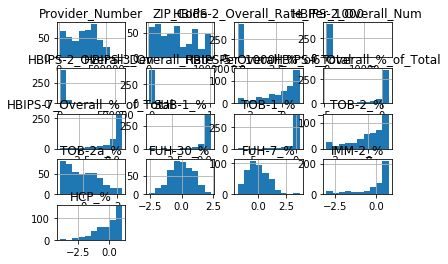

In [135]:
new_df=df[((df[metric_cols]>-4)|(df[metric_cols]<4)).all(axis=1)]
new_df.hist()

In [136]:
len(new_df)

451

In [137]:
len(df)

1644

In [139]:
new_df=df
for each_col in metric_cols: 
    new_df=new_df[~((df[each_col]>4) | (df[each_col]<-4))]

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinlee/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5db9c0550>,
      dtype=object)

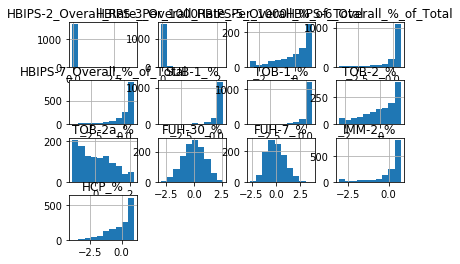

In [146]:
new_df[metric_cols].hist()

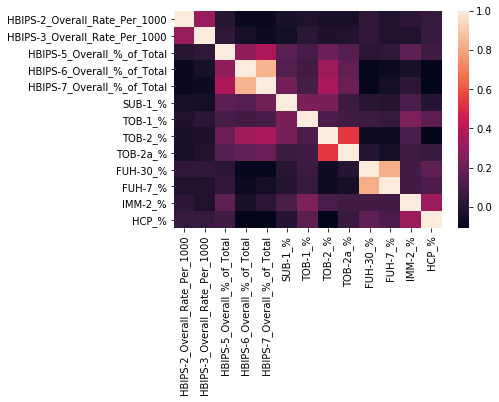

In [149]:
sn.heatmap(new_df[metric_cols].corr())

In [147]:
new_df.to_csv('updated_05042021.csv', index=False)

In [144]:
df[metric_cols].min()

HBIPS-2_Overall_Rate_Per_1000   -0.055607
HBIPS-3_Overall_Rate_Per_1000   -0.044273
HBIPS-5_Overall_%_of_Total      -2.546723
HBIPS-6_Overall_%_of_Total      -4.773540
HBIPS-7_Overall_%_of_Total      -3.924228
SUB-1_%                         -4.354508
TOB-1_%                         -6.355722
TOB-2_%                         -2.340849
TOB-2a_%                        -1.348695
FUH-30_%                        -4.198805
FUH-7_%                         -2.681433
IMM-2_%                         -3.046432
HCP_%                           -3.976003
dtype: float64